Import Dependencies

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Data Collection and Processing

In [2]:
# Loadind dataset into pandas dataframe 
loan_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/loan_data.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Check the number of rows and column
loan_data.shape

(614, 13)

In [4]:
# Names of columns
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Basic statistical Measures 
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# general info about the dataset 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking for missing values 
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Dropping missing values 
loan_data = loan_data.dropna()

In [9]:
# Checking for missing values 
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Convert categorical columns to numerical values 
loan_data.replace({'Married':{'No':0, "Yes":1},
                  'Gender':{'Male':1, 'Female':0},
                  'Self_Employed':{'No':0, 'Yes':1},
                  'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},
                   'Loan_Status':{'N':0,"Y":1},
                   'Education':{"Graduate":1, 'Not Graduate':0}
                  }, inplace=True)
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

In [11]:
# Dependent column values 
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
# Replacing the value of 3+ to 3 
loan_data = loan_data.replace(to_replace='3+', value=3)

In [13]:
# dependent values 
loan_data['Dependents'].value_counts()


Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

##### Data Visualization 

<Axes: xlabel='Education', ylabel='count'>

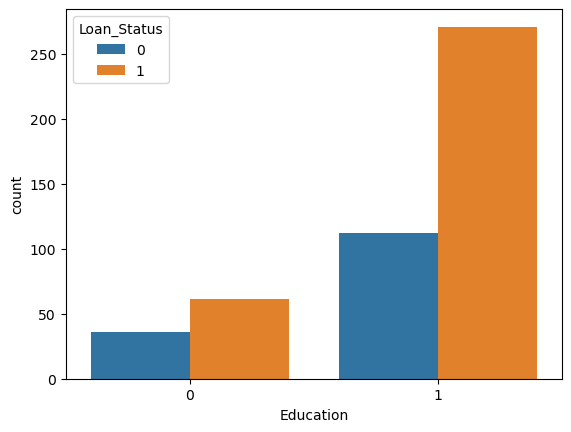

In [14]:
# Education & Loan Status
sns.countplot(x='Education', hue="Loan_Status", data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

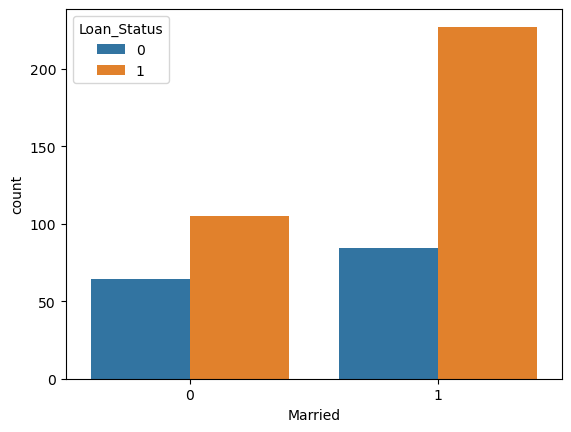

In [15]:
# Marital status & Loan Status 
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Gender', ylabel='count'>

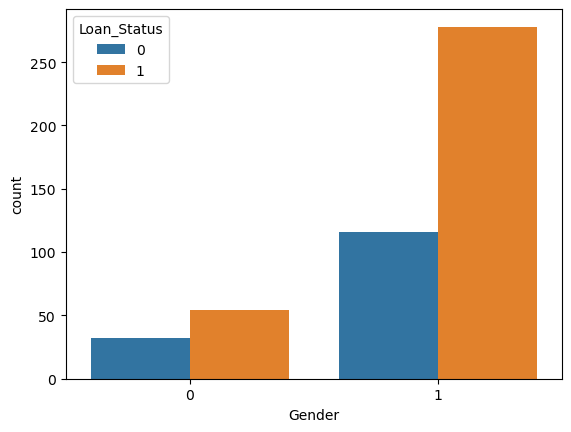

In [16]:
# Gender & Loan Status 
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Dependents', ylabel='count'>

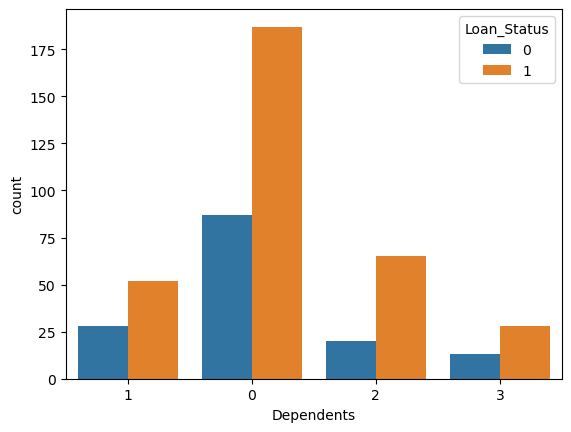

In [17]:
# Dependent & Loan Status 
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_data)

Separating the data and label

In [18]:
# Separating the data and label 
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_data['Loan_Status'].astype(int)

In [19]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [20]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32


Seperating Data into Training and Test Data

In [21]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=13)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


##### Training the model: Support Vector Machine

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
#training the support vector machine 
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [25]:
# accuracy score on the training data 
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.7870370370370371


In [27]:
# accuracy score on the test data 
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy on test data :', test_data_accuracy)

Accuracy on test data : 0.7083333333333334
